# Introduction

### Trash Datathon 2021
### Artificial Intelligence (AI) and Modeling

Welcome to the 2021 Trash Datathon! Purpose of this notebook will be to provide an example application of machine learning for trash level score classification using the City of LA [CleanStat][01.00] dataset from their open data portal. CleanStat is part of a larger city initiative to address litter, and additional info is provided in this [factsheet][01.01].

This notebook is based an introductory template from Google Colab, so listed below are instructions for those who are new to Colab, Jupyter or Python followed by the example application under its own section. All sections can be navigated within the notebook.

Please note that this notebook is intended as a brief introduction to AI/ML modeling and examples are provided to encourage additional development/collaboration.

[01.00]: https://geohub.lacity.org/datasets/clean-streets-index-2016-q1?geometry=-120.483%2C33.623%2C-116.341%2C34.420
[01.01]: https://results4america.org/wp-content/uploads/2018/12/LosAngelesCaseStudy_Final.pdf


<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>What is Colaboratory?</h1>

Colaboratory, or "Colab" for short, allows you to write and execute Python in your browser, with 
- Zero configuration required
- Free access to GPUs
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

## **Getting started**

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [65]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day


86400

In [66]:
seconds_new = seconds_in_a_day + 1
seconds_new

86401

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [67]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

## Data science

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

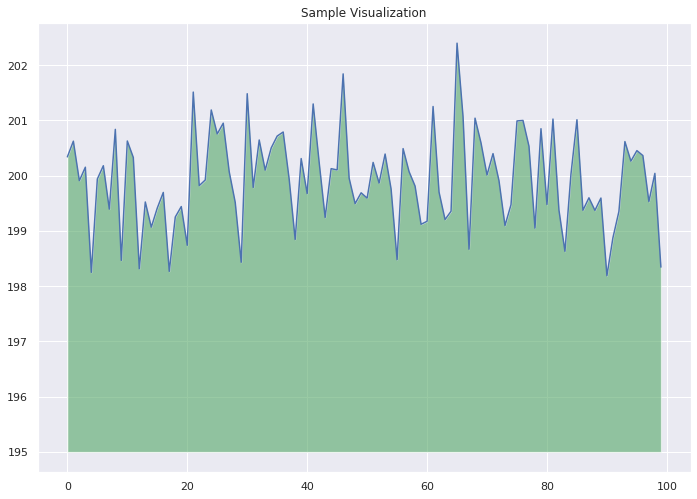

In [68]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

## Machine learning

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

## More Resources

### Working with Notebooks in Colab
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [First steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Intro to neural nets](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Intro to sparse data and embeddings](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

# Trash Level Classification

### Exploratory Data Analysis and Modeling

This section provides code for downloading the CleanStat dataset from the City of LA open data portal and complete exploratory data analysis, aka [EDA][02.00]. EDA includes reviewing the dataset dimensions, distribution and feature correlation.

After EDA, the modeling is completed using the python [scikit-learn][02.01] library to train/test a random forest classifier. Results are evaluated using a confusion matrix, and code is available to encourage additional development/collaboration.

[02.00]: https://en.wikipedia.org/wiki/Exploratory_data_analysis 
[02.01]: https://scikit-learn.org/stable/


In [69]:
# 01.00 setup module

# data analysis modules
import pandas as pd
import numpy as np

# plot module and config settings
import matplotlib.pyplot as plt
%matplotlib inline

# plot module and config settings
import seaborn as sns
sns.set_theme()
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))
sns.set(rc={'figure.figsize':(11.7,8.27)})

# ml module
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# read data and view contents
# https://geohub.lacity.org/datasets/clean-streets-index-2016-q1
df = pd.read_csv('https://opendata.arcgis.com/datasets/661fe82f121a4eb795a1d3884a06f1da_0.csv')
print('Output first 5 rows:')
print(df.head(), '\n')
print('Output dataset info:')
print(df.info(), '\n')
print('Output unique values for segment name:')
print(df['FullName'].unique(), '\n')

# filter data for model train/predict
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
df_subset = df[[
    'OBJECTID',
    'SegmentID',
    'Seg_ID_Sco',
    'Seg_Bk_Sco',
    'Seg_LL_Sco',
    'Seg_Wd_Sco',
    'SegScore'
]]

# split train and test data
# https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas
print('Output df shape:')
print(df.shape, '\n')
train, test = train_test_split(df_subset, test_size=0.2)
print('Output train df shape:')
print(train.shape, '\n')
print('Output test df shape:')
print(test.shape, '\n')

# train rf classifier
# https://stackabuse.com/classification-in-python-with-scikit-learn-and-pandas/
y_train = train.iloc[:,6]
X_train = train.iloc[:,:6]
y_test = test.iloc[:,6]
X_test = test.iloc[:,:6]

# encode labels as continuous
# https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python
# lab_enc = preprocessing.LabelEncoder()
# y_train = lab_enc.fit_transform(y_train)
# y_test = lab_enc.fit_transform(y_test)
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')
print('Output X_train df info:')
print(X_train.info(), '\n')
print('Output X_test df info:')
print(X_test.info(), '\n')
print('Output y_train df info:')
print(y_train.dtype, '\n')
print('Output y_test df info:')
print(y_test.dtype, '\n')


Output first 5 rows:
   OBJECTID FullName  MIN_From_L  ...  SHAPE_Leng  SegScore  DisplayGra
0         1                    0  ...   42.521183       1.0           1
1         2                    0  ...    2.307199       1.0           1
2         3                    0  ...   84.871168       1.0           1
3         4                    0  ...   19.283651       1.0           1
4         5                    0  ...  366.016428       1.5           2

[5 rows x 20 columns] 

Output dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38343 entries, 0 to 38342
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    38343 non-null  int64  
 1   FullName    38343 non-null  object 
 2   MIN_From_L  38343 non-null  int64  
 3   BulkyItems  38343 non-null  int64  
 4   IllegalDum  38343 non-null  int64  
 5   LooseLitte  38343 non-null  int64  
 6   Weeds       38343 non-null  int64  
 7   SW_Bulky_I  38343 

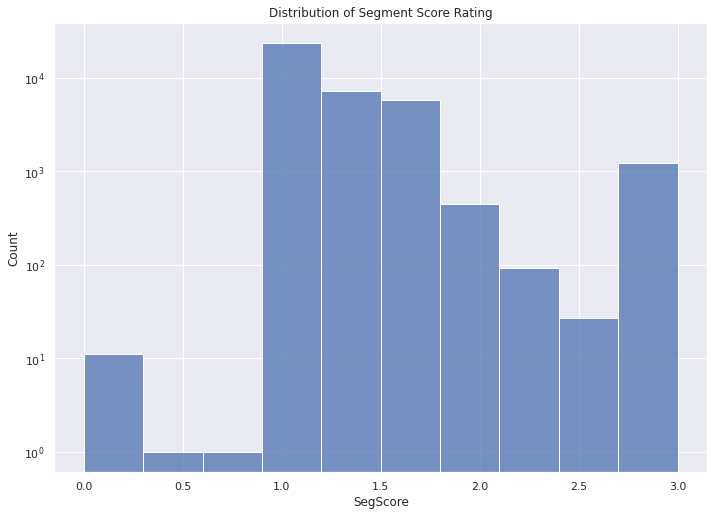

In [70]:
# 01.01 distribution plot

# plot distribution
# https://www.datacamp.com/community/tutorials/python-data-profiling
sns.histplot(
    df["SegScore"].dropna(),
    bins=10
).set_title('Distribution of Segment Score Rating')
# visualize histogram with log scale
# https://stackoverflow.com/questions/23913151/log-log-lmplot-with-seaborn
plt.yscale('log')


Output dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38343 entries, 0 to 38342
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    38343 non-null  int64  
 1   MIN_From_L  38343 non-null  int64  
 2   BulkyItems  38343 non-null  int64  
 3   IllegalDum  38343 non-null  int64  
 4   LooseLitte  38343 non-null  int64  
 5   Weeds       38343 non-null  int64  
 6   SW_Bulky_I  38343 non-null  int64  
 7   SW_Illegal  38343 non-null  int64  
 8   SW_LooseLi  38343 non-null  int64  
 9   SW_Weeds    38343 non-null  int64  
 10  SegmentID   38343 non-null  int64  
 11  Seg_ID_Sco  38343 non-null  int64  
 12  Seg_Bk_Sco  38343 non-null  int64  
 13  Seg_LL_Sco  38343 non-null  int64  
 14  Seg_Wd_Sco  38343 non-null  int64  
 15  NonGrade    38343 non-null  int64  
 16  SHAPE_Leng  38343 non-null  float64
 17  SegScore    38343 non-null  float64
 18  DisplayGra  38343 non-null  int64  
dtypes: f

Text(0.5, 1.0, 'Correlation Heatmap')

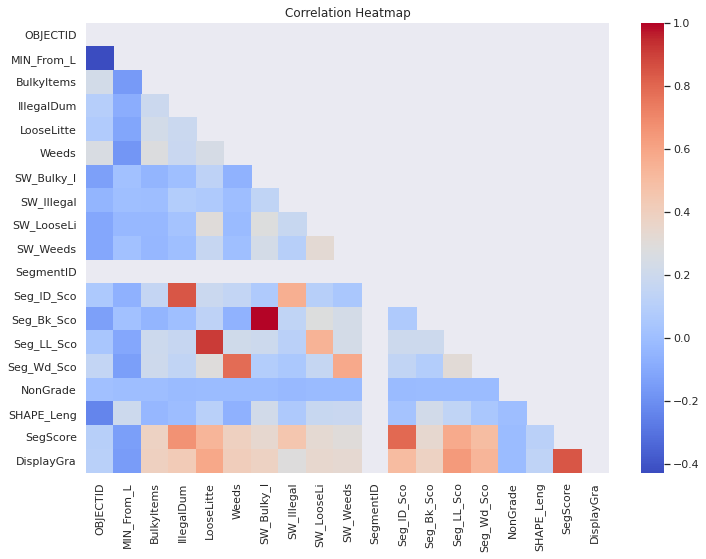

In [71]:
# 01.02 correlation heatmap plot

# remove non-numeric columns
# https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe
df_num = df.drop('FullName', 1)
print('Output dataset info:')
print(df_num.info(), '\n')
# calculate correlation and generate mask for upper triangle
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = df_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# create heatmap with color palette
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm'
).set_title('Correlation Heatmap')


In [72]:
# 01.03 classifier model (train)

# train initial classifier, then improve with grid search
# https://stackoverflow.com/questions/30102973/how-to-get-best-estimator-on-gridsearchcv-random-forest-classifier-scikit
rfc = RandomForestClassifier(
    n_jobs=-1,
    max_features='sqrt',
    n_estimators=100,
    oob_score=True,
    random_state=12345
)
# run grid search to find best parameters
# note: grid search takes ~5 min to run, so uncomment to run
# param_grid = {
#     'n_estimators': [200, 300, 400, 500],
#     'max_features': ['auto', 'sqrt', 'log2']
# }
# rfc_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
# rfc_cv.fit(X_train, y_train)
# output best parameters, then refit model
# https://www.kaggle.com/sociopath00/random-forest-using-gridsearchcv
# print('Grid Search Results - Best Parameters:')
# print(rfc_cv.best_params_)
# output:
# Grid Search Results - Best Parameters:
# {'max_features': 'auto', 'n_estimators': 200}
# refit model with best parameters from grid search
rfc_params = RandomForestClassifier(
    n_jobs=-1,
    max_features='auto',
    n_estimators=200,
    oob_score=True,
    random_state=12345
)
rfc_params.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=12345, verbose=0,
                       warm_start=False)

Out-of-bag score estimate: 0.9921
Mean accuracy score: 0.9919


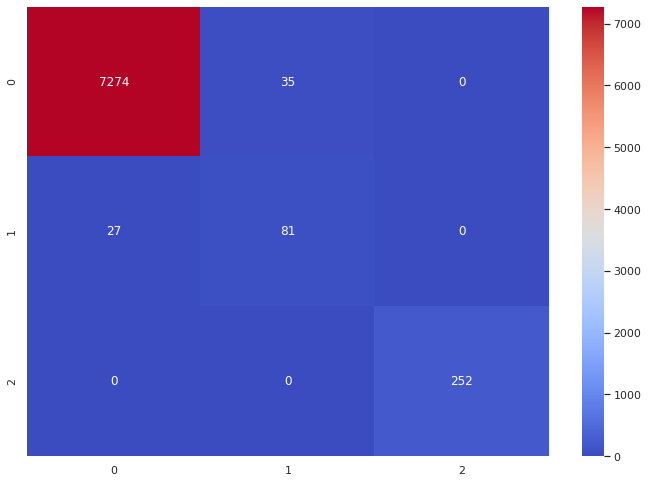

In [73]:
# 01.04 rf classifier model (test)

# make predictions and calculate accuracy score
# https://www.blopig.com/blog/2017/07/using-random-forests-in-python-with-scikit-learn/
# rfc_params.predict(X_test)
# print('Random Classifier Accuracy Score:')
# round(rfc_params.score(X_test,y_test), 4)
predicted = rfc_params.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Out-of-bag score estimate: {rfc_params.oob_score_:.4}')
print(f'Mean accuracy score: {accuracy:.4}')

# create/plot confusion matrix
# https://www.blopig.com/blog/2017/07/using-random-forests-in-python-with-scikit-learn/
cm = pd.DataFrame(
    confusion_matrix(y_test, predicted),
    # columns=df['SegScore'],
    # index=df['SegScore']
)
sns.heatmap(cm,
    annot=True,
    cmap='coolwarm',
    fmt='g'
)
